### 美国总统大选数据分析项目

导入包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

方便操作，将月份和参选人以及所在政党进行定义

In [2]:
# 月份
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}

# 候选人
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']

# 候选人所在党派party
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

读取文件

In [3]:
# 因为数据列有混合类型，读取的时候Pandas默认要找到可以使所占空间最小的类型。
# low_memory=False ： Pandas就不会去找低内存（占用空间小）的类型，直接使用较大内存的类型

usa = pd.read_csv('data/13_美国总统大选数据分析项目/usa_election.txt', low_memory=False)
usa.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


查看文件样式以及基本信息

In [4]:
usa.shape
# 53万多条，16列

(536041, 16)

In [5]:
usa.sample(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
32615,C00431171,P80003353,"Romney, Mitt","BROWNLIE, ROBERT P. MR.",CHARLOTTE,NC,282772717,RETIRED,RETIRED,500.0,16-DEC-11,NaN,NaN,NaN,SA17A,763507
100279,C00431445,P80003338,"Obama, Barack","WASSERMAN, KAROLYN K",EL MACERO,CA,956181009,NOT EMPLOYED,NOT EMPLOYED,25.0,22-NOV-11,NaN,NaN,NaN,SA17A,763233
409903,C00495820,P80000748,"Paul, Ron","STAHL, DUANE",VALLEY CITY,ND,580722942,DIETRICH'S BUS SERVICE,SCHOOL BUS DRIVER,50.0,27-NOV-11,NaN,NaN,NaN,SA17A,767168


【知识点】使用map函数+字典，新建一列各个候选人所在党派party

In [6]:
usa['party'] = usa['cand_nm'].map(parties)

In [7]:
usa.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican


查看单独一行，是否加上了'party'一列

In [8]:
usa.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


使用np.unique()函数查看colums：party这一列中有哪些元素

In [9]:
usa['party'].unique()

# 党派
# ['Republican', 'Democrat', 'Reform', 'Libertarian'] 

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

使用value_counts()函数，统计party列中各个元素出现次数

In [10]:
# 各个党派出现的次数 
usa['party'].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

【知识点】使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [11]:
usa.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [12]:
usa.groupby('party')['contb_receipt_amt'].sum()

party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

查看具体每天各个党派收到的政治献金总数contb_receipt_amt  
使用groupby([多个分组参数])

In [13]:
usa.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [14]:
usa['contb_receipt_dt'].unique().size

376

In [15]:
# 每天各个党派收到的政治献金总数
usa.groupby(by=['party', 'contb_receipt_dt'])[['contb_receipt_amt']].sum()

contb_receipt_amt
party      contb_receipt_dt                   
Democrat   01-AUG-11                 175281.00
           01-DEC-11                 651532.82
           01-JAN-12                  58098.80
           01-JUL-11                 165961.00
           01-JUN-11                 145459.00
...                                        ...
Republican 31-JAN-12                 869890.41
           31-JUL-11                  12781.02
           31-MAR-11                  62475.00
           31-MAY-11                 301339.80
           31-OCT-11                 734601.83

[1183 rows x 1 columns]

查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [16]:
usa.head(2)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [17]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536041 entries, 0 to 536040
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            536041 non-null  object 
 1   cand_id            536041 non-null  object 
 2   cand_nm            536041 non-null  object 
 3   contbr_nm          536041 non-null  object 
 4   contbr_city        536026 non-null  object 
 5   contbr_st          536040 non-null  object 
 6   contbr_zip         535973 non-null  object 
 7   contbr_employer    525088 non-null  object 
 8   contbr_occupation  530520 non-null  object 
 9   contb_receipt_amt  536041 non-null  float64
 10  contb_receipt_dt   536041 non-null  object 
 11  receipt_desc       8479 non-null    object 
 12  memo_cd            49718 non-null   object 
 13  memo_text          52740 non-null   object 
 14  form_tp            536041 non-null  object 
 15  file_num           536041 non-null  int64  
 16  pa

In [18]:
months

{'JAN': 1,
 'FEB': 2,
 'MAR': 3,
 'APR': 4,
 'MAY': 5,
 'JUN': 6,
 'JUL': 7,
 'AUG': 8,
 'SEP': 9,
 'OCT': 10,
 'NOV': 11,
 'DEC': 12}

In [19]:
# map要用的函数
def convert(x):
    # 20-JUN-11
    day, month, year = x.split('-')
    month2 = months[month]
    return f'20{year}-{month2}-{day}'

In [20]:
usa['contb_receipt_dt'] = usa['contb_receipt_dt'].map(convert)

查看是否转换成功

In [21]:
usa.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,2011-6-20,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,2011-6-23,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-7-05,NaN,NaN,NaN,SA17A,749073,Republican


将时间转换为时间数据类型  
根据时间进行排序

In [22]:
usa.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
party                 object
dtype: object

In [23]:
usa['contb_receipt_dt'] = pd.to_datetime(usa['contb_receipt_dt'])

In [24]:
usa.dtypes

cmte_id                      object
cand_id                      object
cand_nm                      object
contbr_nm                    object
contbr_city                  object
contbr_st                    object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
receipt_desc                 object
memo_cd                      object
memo_text                    object
form_tp                      object
file_num                      int64
party                        object
dtype: object

得到转换后的，每天各政党所收政治献金数目。  

考察知识点：groupby（多个字段）

In [25]:
# 每天各个党派收到的政治献金总数
usa2 = usa.groupby(by=['party', 'contb_receipt_dt'])[['contb_receipt_amt']].sum()
usa2

contb_receipt_amt
party      contb_receipt_dt                   
Democrat   2011-04-04                640235.12
           2011-04-05                307641.00
           2011-04-06                247542.59
           2011-04-07                252336.00
           2011-04-08                295452.00
...                                        ...
Republican 2012-01-27                368441.82
           2012-01-28                 82775.80
           2012-01-29                 75220.02
           2012-01-30                255204.80
           2012-01-31                869890.41

[1183 rows x 1 columns]

【知识点】使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [26]:
usa3 = usa2.unstack(level=0, fill_value=0)
usa3

contb_receipt_amt                                
party                     Democrat Libertarian   Reform Republican
contb_receipt_dt                                                  
2011-01-01                    0.00         0.0     0.00    8600.00
2011-01-03                    0.00         0.0     0.00    4800.00
2011-01-04                    0.00         0.0     0.00    5000.00
2011-01-12                    0.00         0.0     0.00    4150.00
2011-01-13                    0.00         0.0     0.00    4000.00
...                            ...         ...      ...        ...
2012-01-27               305785.47         0.0  3176.37  368441.82
2012-01-28               235492.85         0.0   175.00   82775.80
2012-01-29                93177.00         0.0   200.00   75220.02
2012-01-30               435921.72         0.0   130.00  255204.80
2012-01-31              1418410.31         0.0   150.00  869890.41

[376 rows x 4 columns]

使用上面获取的数据  
画出各党派累计政治献金,cumsum()累加函数

In [27]:
ss = pd.Series([1, 2, 3 ,4, 5, 6])
ss.cumsum()

0     1
1     3
2     6
3    10
4    15
5    21
dtype: int64

<AxesSubplot:xlabel='contb_receipt_dt'>

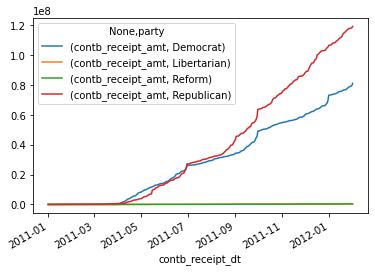

In [28]:
usa4 = usa3.cumsum()
usa4.plot()

把时间作为列，党派作为行来观察,unstack('contb_receipt')

In [29]:
usa2.unstack()

contb_receipt_amt                                   \
contb_receipt_dt        2011-01-01 2011-01-03 2011-01-04 2011-01-12   
party                                                                 
Democrat                       NaN        NaN        NaN        NaN   
Libertarian                    NaN        NaN        NaN        NaN   
Reform                         NaN        NaN        NaN        NaN   
Republican                  8600.0     4800.0     5000.0     4150.0   

                                                                         \
contb_receipt_dt 2011-01-13 2011-01-14 2011-01-15 2011-01-16 2011-01-17   
party                                                                     
Democrat                NaN        NaN        NaN        NaN        NaN   
Libertarian             NaN        NaN        NaN        NaN        NaN   
Reform                  NaN        NaN        NaN        NaN        NaN   
Republican           4000.0     6000.0      500.0      750.0      500.0   

                             ...                                              \
contb_receipt_dt 2011-01-18  ... 2012-01-22 2012-01-23 2012-01-24 2012-01-25   
party                        ...                                               
Democrat                NaN  ...   67194.23  337307.07  458909.23  438949.32   
Libertarian             NaN  ...        NaN        NaN        NaN        NaN   
Reform                  NaN  ...     450.00     225.00     500.00     282.00   
Republican           4800.0  ...  507168.71  645477.15  462233.66  416931.39   

                                                                         \
contb_receipt_dt 2012-01-26 2012-01-27 2012-01-28 2012-01-29 2012-01-30   
party                                                                     
Democrat          450268.94  305785.47  235492.85   93177.00  435921.72   
Libertarian             NaN        NaN        NaN        NaN        NaN   
Reform                25.00    3176.37     175.00     200.00     130.00   
Republican        256406.86  368441.82   82775.80   75220.02  255204.80   

                              
contb_receipt_dt  2012-01-31  
party                         
Democrat          1418410.31  
Libertarian              NaN  
Reform                150.00  
Republican         869890.41  

[4 rows x 376 columns]

使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

In [30]:
usa2.unstack(level=0, fill_value=0).stack()

contb_receipt_amt
contb_receipt_dt party                         
2011-01-01       Democrat                  0.00
                 Libertarian               0.00
                 Reform                    0.00
                 Republican             8600.00
2011-01-03       Democrat                  0.00
...                                         ...
2012-01-30       Republican           255204.80
2012-01-31       Democrat            1418410.31
                 Libertarian               0.00
                 Reform                  150.00
                 Republican           869890.41

[1504 rows x 1 columns]

查看候选人姓名cand_nm和政治献金捐献者职业contbr_employer，以及捐献情况。能看出各个候选人主要的支持者分布情况  
练习：groupy，sum()求和

In [31]:
usa.head(2)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,2011-06-20,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,2011-06-23,NaN,NaN,NaN,SA17A,736166,Republican


In [32]:
usa5 = usa.groupby(['cand_nm', 'contbr_employer'])['contb_receipt_amt'].sum()
usa5

cand_nm             contbr_employer              
Bachmann, Michelle  '                                1996.0
                    (RETIRED)                         394.0
                    ---                               100.0
                    0                                 100.0
                    1 SQUARED R ELEMENT CO., INC.    2500.0
                                                      ...  
Santorum, Rick      ZIPPO MFG. COUNTY                 600.0
                    ZOLL MEDICAL CORP.                250.0
                    ZONE 7 LANSCAPES INC.            2000.0
                    ZOOK MOLASSEN COMPANY            2500.0
                    ZOTTOLA FAB                       250.0
Name: contb_receipt_amt, Length: 97825, dtype: float64

查看老兵主要支持谁：DISABLED VETERAN  
考察Series索引

In [33]:
usa5[:, 'DISABLED VETERAN']

cand_nm
Obama, Barack    685.0
Paul, Ron        395.0
Name: contb_receipt_amt, dtype: float64

把索引变成列,Series.reset_index()

In [34]:
usa5.reset_index()

,cand_nm,contbr_employer,contb_receipt_amt
0,"Bachmann, Michelle",',1996.0
1,"Bachmann, Michelle",(RETIRED),394.0
2,"Bachmann, Michelle",---,100.0
3,"Bachmann, Michelle",0,100.0
4,"Bachmann, Michelle","1 SQUARED R ELEMENT CO., INC.",2500.0
...,...,...,...
97820,"Santorum, Rick",ZIPPO MFG. COUNTY,600.0
97821,"Santorum, Rick",ZOLL MEDICAL CORP.,250.0
97822,"Santorum, Rick",ZONE 7 LANSCAPES INC.,2000.0
97823,"Santorum, Rick",ZOOK MOLASSEN COMPANY,2500.0


找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额  

通过query("查询条件来查找捐献人职业")

In [35]:
usa.head(3)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,2011-06-20,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,2011-06-23,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-07-05,NaN,NaN,NaN,SA17A,749073,Republican


In [36]:
usa.groupby(['cand_nm'])['contb_receipt_amt'].max()

cand_nm
Bachmann, Michelle                   3022.00
Cain, Herman                        10000.00
Gingrich, Newt                       5100.00
Huntsman, Jon                        5000.00
Johnson, Gary Earl                   2500.00
McCotter, Thaddeus G                 4000.00
Obama, Barack                     1944042.43
Paul, Ron                            5000.00
Pawlenty, Timothy                   10000.00
Perry, Rick                         10000.00
Roemer, Charles E. 'Buddy' III        200.00
Romney, Mitt                        12700.00
Santorum, Rick                       5000.00
Name: contb_receipt_amt, dtype: float64

In [37]:
# 每个候选人的政治献金的最大金额
nm_max = usa.groupby(['cand_nm'])['contb_receipt_amt'].max()
# display(nm_max)

cand_nm = 'Bachmann, Michelle'
amt_max = nm_max[cand_nm]
display(amt_max)

# 找到Bachmann, Michelle捐献金额最大的人
usa[usa['contb_receipt_amt'] == amt_max]
# usa.query('cand_nm==@cand_nm and contb_receipt_amt==@amt_max')

3022.0

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
514665,C00497511,P20002978,"Bachmann, Michelle","LIBERAL, NICOL",BROOKLYN,NY,112265510,FREEDOM ALLIANCE,GOVERNMENT MEMBER,3022.0,2011-12-27,NaN,NaN,NaN,SA17A,762366,Republican
